<a href="https://colab.research.google.com/github/AIPractioner/Churn-Project/blob/main/AAI510Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Matt Thompson
# Final Assignment
# AAI 510
# On Github    https://github.com/AIPractioner/Churn-Project/

Customer churn poses a significant challenge for e-commerce businesses, leading to lost revenue and decreased customer  stability. Proactively identifying customers at risk of churning is critical for implementing retention strategies and maximizing customer lifetime value. Our current process lacks an automated and data-driven approach to accurately predict which customers are likely to churn.

This project aims to develop and evaluate supervised machine learning models to predict customer churn using a dataset from Kaggle as the basis for training and verifying the models. The goal is to build a model that can effectively distinguish between customers who are likely to remain loyal and those who are at high risk of churning, enabling the business to intervene and improve customer retention. Some challenges include handling unbalanced class distribution, preparing and engineering relevant features from the raw data, and selecting a model that offers the right balance of performance metrics, particularly in identifying the minority 'Churn' class as well as balancing the resources needed for training & deploying the chosen model.

The code in this cell is focused on initial data exploration and preparation. It begins by mounting Google Drive to access an Excel dataset. Subsequently, it loads the data into a pandas DataFrame, displays its initial rows, provides summaries of column types, non-null counts, and basic statistical descriptions, and checks for missing values within the dataset.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Import the drive function from google.colab
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to the dataset
dataset_path = '/content/drive/My Drive/Colab Notebooks/AAI510Final/ecommdataset.xlsx'

# Load the dataset into a pandas dataframe
df = pd.read_excel(dataset_path, sheet_name=1)

# Print column names
print()
print("The column titles")
print()
pd.set_option('display.max_columns', 10)
print(df.columns)
print()
num_columns = len(df.columns)
print(f"Number of columns using len(df.columns): {num_columns}")
print()

print("-" * 45)
print("The first 5 rows of data and the column title")
print("-" * 45)

print()
# Display the first 5 rows of the DataFrame
print(df.head())

print()
print("-" * 45)
print("Display a summary of column types and non-null counts")
print("-" * 45)
print(df.info())

print()
print("-" * 45)
print("Display a statistical summary of numerical columns")
print("-" * 45)
print(df.describe())

print()
print("-" * 45)
print("Checking for missing values in columns")
print("-" * 45)
print(df.isnull().sum())           # Count missing values per column
print(df.isnull().sum() / len(df)) # Percentage of missing values per column


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

The column titles

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Number of columns using len(df.columns): 20

---------------------------------------------
The first 5 rows of data and the column title
---------------------------------------------

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  ...  \
0       50001      1     4.0         Mobile Phone         3  ...   
1       50002      1     NaN                Phone         1  ...   
2       50003      1     NaN              

This cell is focused on starting the process of cleaning the data. It starts by dropping rows with missing values, and then as a check, displaying the number of missing values by column (which should be zero).



In [ ]:
# We need to clean the data. Start by addressing missing values.
# From the cell above, the total number of missing values is small
# And the % of missing values (to the total) is small, so let's
# Remove the the rows with missing values.

# Remove rows with any missing values
df_cleaned = df.dropna()

print()
print("-" * 45)
print("Shape of the DataFrame after removing rows with missing values")
print("-" * 45)
print(df_cleaned.shape)

print()
print("-" * 45)
print("Checking for missing values after removal")
print("-" * 45)
print(df_cleaned.isnull().sum())


---------------------------------------------
Shape of the DataFrame after removing rows with missing values
---------------------------------------------
(3774, 20)

---------------------------------------------
Checking for missing values after removal
---------------------------------------------
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


This code focuses on visualizing numerical data to identify potential outliers. It first identifies all numerical columns within the DataFrame. Then, for each numerical column, it generates and displays a box plot, which helps to visually inspect the data distribution and pinpoint any data points that fall significantly outside the typical range. This is the beginning our exploratory data analysis (EDA).

Total number of columns: 20

Number of numerical columns: 15
Non-numerical columns:
['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']



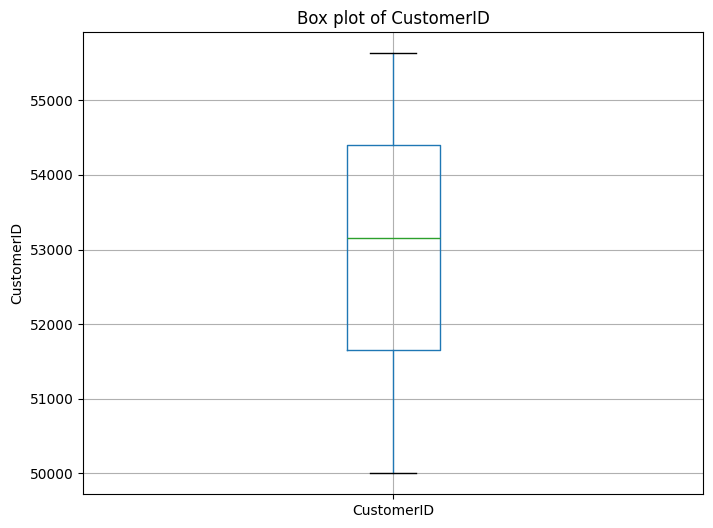

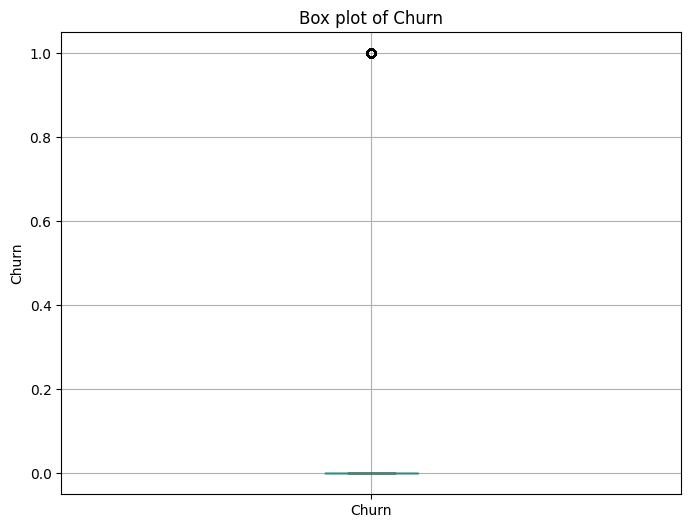

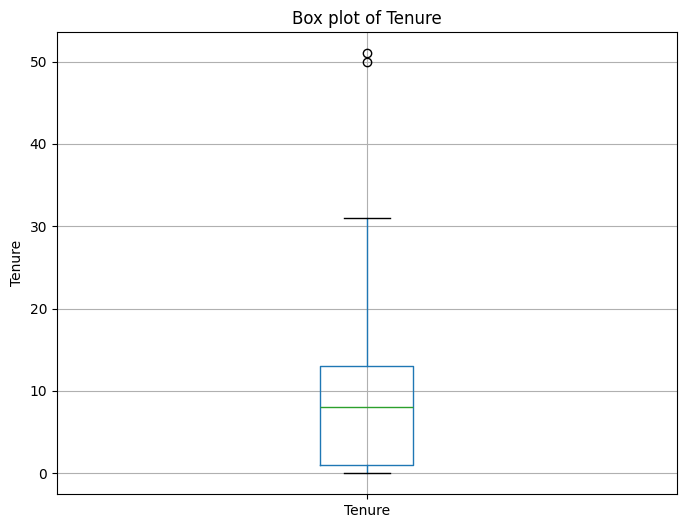

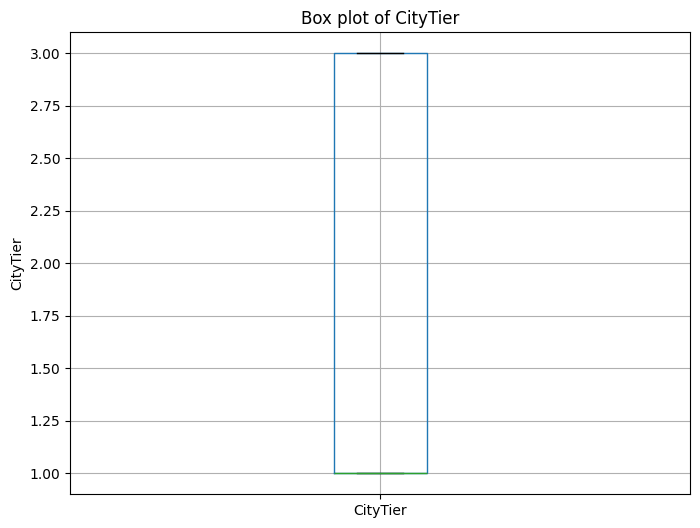

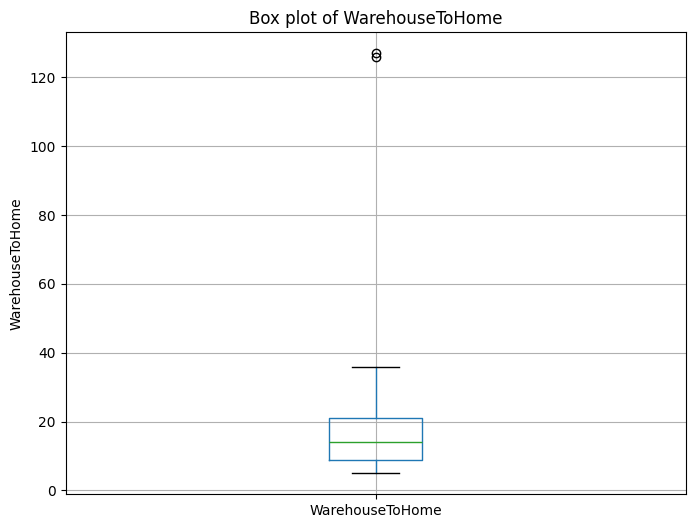

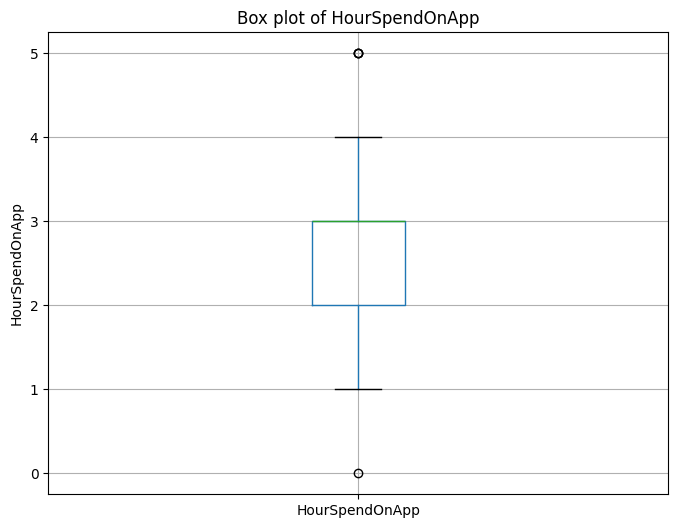

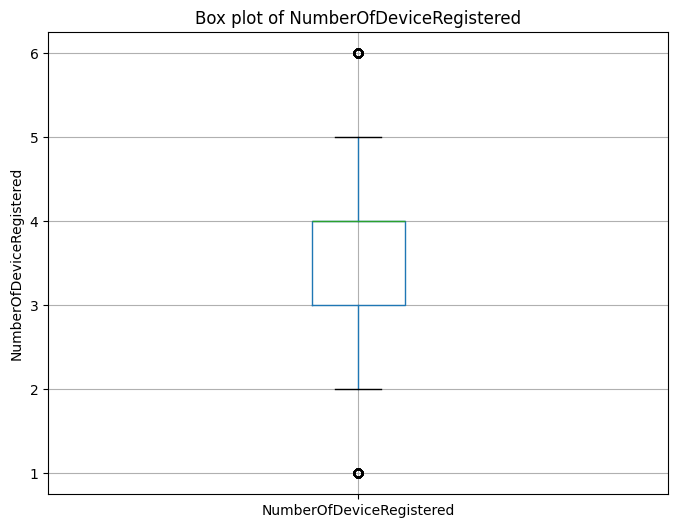

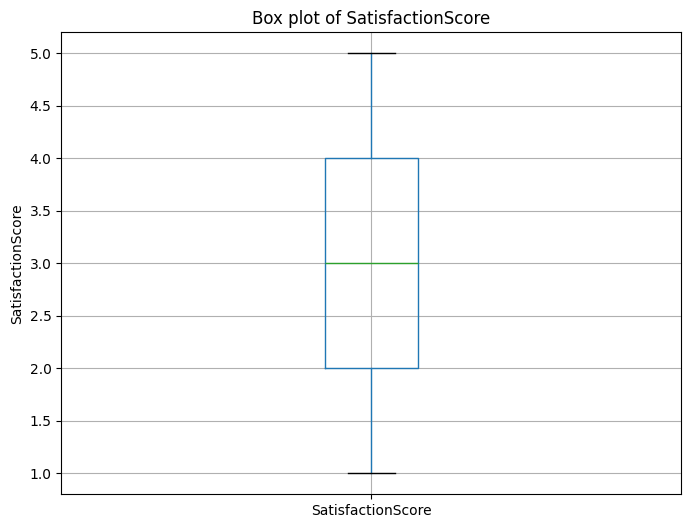

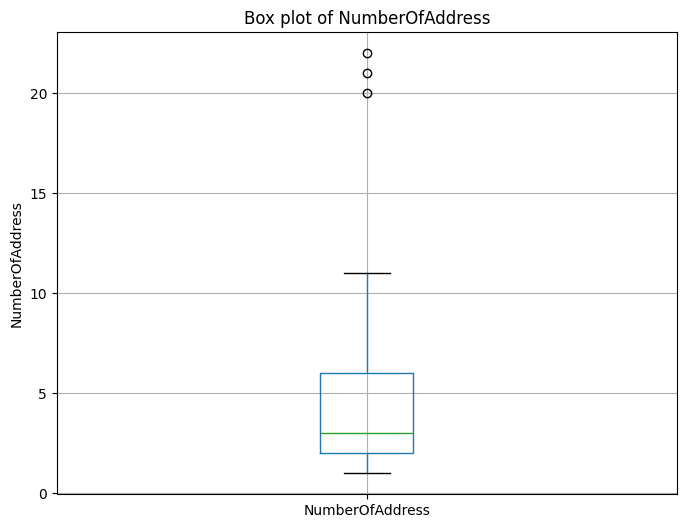

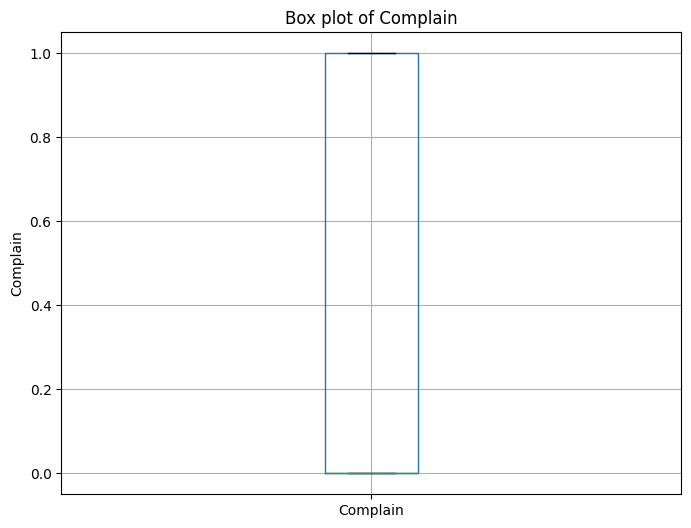

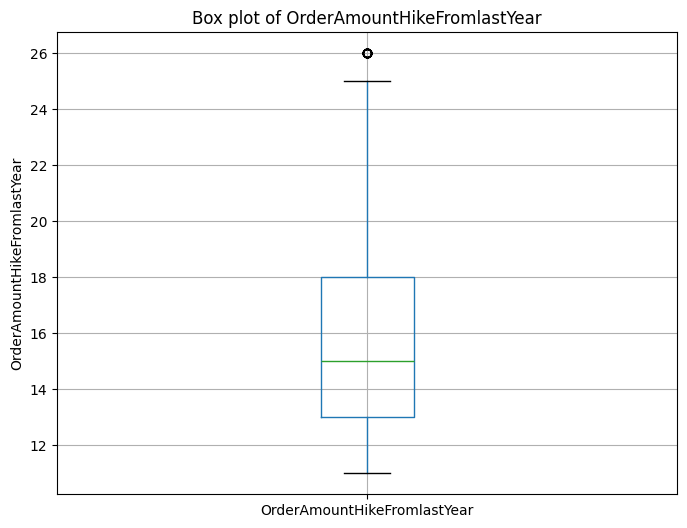

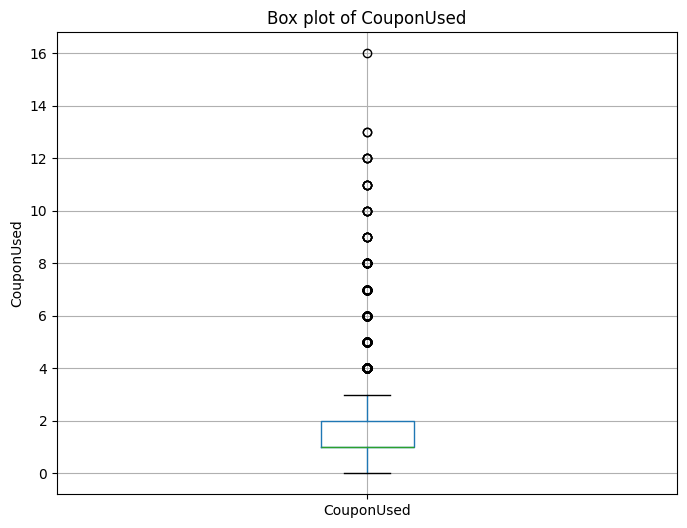

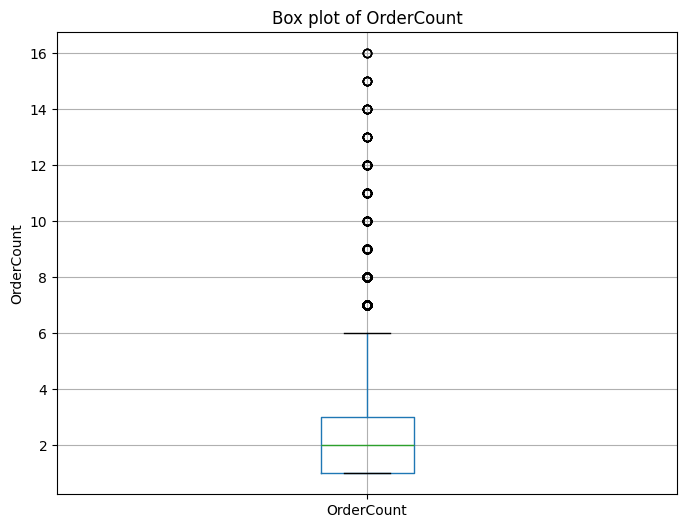

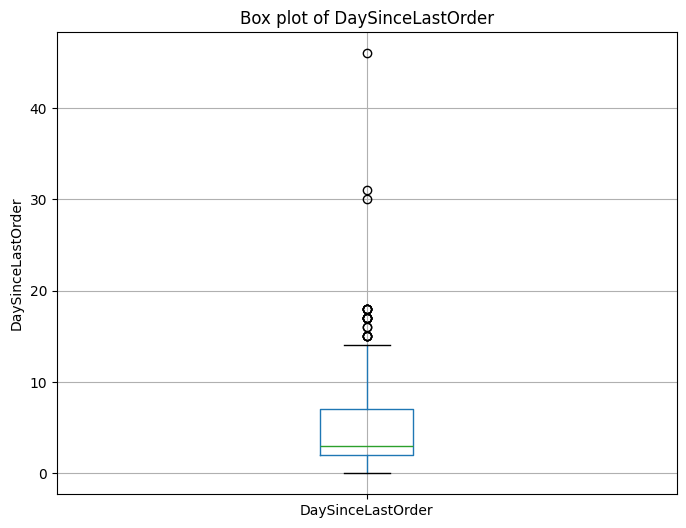

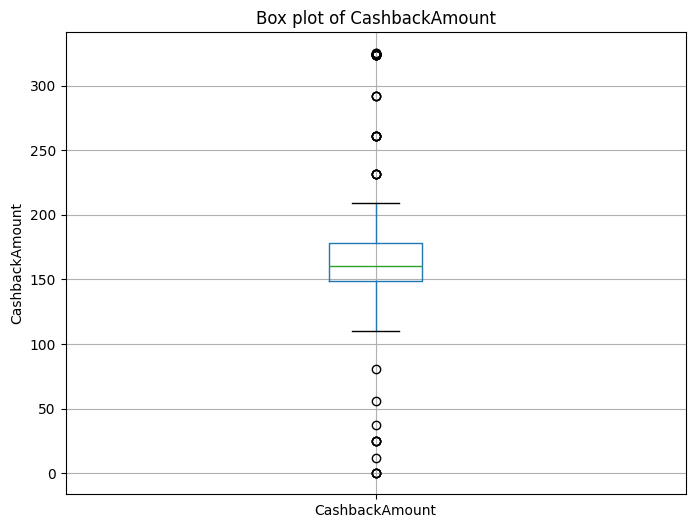

In [ ]:
# Visualize the data to see if there are outliers

# Print the total number of columns
num_columns = len(df.columns)
print(f"Total number of columns: {num_columns}")
print()

# Select numerical columns for visualization
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns

# Get the number of numerical columns
num_numerical_cols = len(numerical_cols)

# Print the number of numerical columns
print(f"Number of numerical columns: {num_numerical_cols}")

# Select the non-numerical columns
non_numerical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Print the names of the non-numerical columns
print("Non-numerical columns:")
print(non_numerical_cols)

print()
# Create box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6)) # Adjust figure size as needed
    df_cleaned.boxplot(column=col)
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()
    print()

This code snippet analyzes numerical columns in a DataFrame to identify those that might actually represent categorical data. It iterates through each numerical column, counts its unique values, and flags columns with unique value counts below a defined threshold as potentially categorical. This process helps to distinguish between continuous numerical features and discrete numerical features that should be treated as categories. To differentiate between these two I use a unique_value_threshold = 20.



In [ ]:
# Get a clear view of numerical and categorical data

# Select numerical columns
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

# Define a threshold for considering a numerical column potentially categorical
unique_value_threshold = 20

# Create a list to store potential categorical column names
potential_categorical_numerical_cols = []

print("Checking numerical columns for potential categorical data:")
print("-" * 50)

for col in numerical_cols:
    num_unique_values = df[col].nunique()
    total_rows = len(df)

    print(f"Column '{col}':")
    print(f"  Number of unique values: {num_unique_values}")
    print(f"  Total number of rows: {total_rows}")

    if num_unique_values <= unique_value_threshold:
        print(f"  This column might represent categorical data (unique values <= {unique_value_threshold}).")
        potential_categorical_numerical_cols.append(col) # Add to the list

    else:
        print("  This column appears to be truly numerical.")
    print("-" * 50)

print("\n---- Summary of potential categorical numerical columns ----")
if potential_categorical_numerical_cols:
    print("Based on the unique value threshold, the following numerical columns might be categorical:")
    for col in potential_categorical_numerical_cols:
        print(f"- {col}")
else:
    print("No numerical columns were identified as potentially categorical based on the threshold.")
print("-" * 60)

Checking numerical columns for potential categorical data:
--------------------------------------------------
Column 'CustomerID':
  Number of unique values: 5630
  Total number of rows: 5630
  This column appears to be truly numerical.
--------------------------------------------------
Column 'Churn':
  Number of unique values: 2
  Total number of rows: 5630
  This column might represent categorical data (unique values <= 20).
--------------------------------------------------
Column 'Tenure':
  Number of unique values: 36
  Total number of rows: 5630
  This column appears to be truly numerical.
--------------------------------------------------
Column 'CityTier':
  Number of unique values: 3
  Total number of rows: 5630
  This column might represent categorical data (unique values <= 20).
--------------------------------------------------
Column 'WarehouseToHome':
  Number of unique values: 34
  Total number of rows: 5630
  This column appears to be truly numerical.
-----------------

This code prepares data for modeling by first dropping rows with missing values and creating a proxy RFM (Recency, Frequency, Monetary) DataFrame from selected columns. It then builds new interaction features by combining existing numerical columns, hoping to enable more complex relationships within the data. It also confirms the presence and summarizes the "DaySinceLastOrder" feature. Given its existence, there no need for additional time-based feature creation involving this feature.

In [ ]:
# Data preparation:organizing the data for modeling

df_cleaned = df.dropna().copy()

# Look at feature engineering
# 1. Data Preparation

rfm_proxy_df = df_cleaned[['CustomerID', 'DaySinceLastOrder', 'OrderCount', 'CashbackAmount']].copy()

# Rename columns for clarity if desired
rfm_proxy_df.rename(columns={
    'DaySinceLastOrder': 'RecencyProxy',
    'OrderCount': 'Frequency',
    'CashbackAmount': 'MonetaryProxy'
}, inplace=True)

# Display the first few rows of the proxy RFM DataFrame
print("RFM Proxy Features:")
print(rfm_proxy_df.head())

# Create interaction features

# 1. Engagement/Activity and Monetary
df_cleaned['Hours_x_Orders'] = df_cleaned['HourSpendOnApp'] * df_cleaned['OrderCount']
df_cleaned['Hours_x_Cashback'] = df_cleaned['HourSpendOnApp'] * df_cleaned['CashbackAmount']
df_cleaned['Orders_x_AmountHike'] = df_cleaned['OrderCount'] * df_cleaned['OrderAmountHikeFromlastYear']

# 2. Customer Profile and Behavior
df_cleaned['Tenure_x_Orders'] = df['Tenure'] * df_cleaned['OrderCount']

# Display the first few rows with the new interaction features
print("\nDataFrame with Interaction Features:")
print(df_cleaned.head())

# We do not need to create any time-based features because the
# dataset already has 'DaysSinceLastOrder' as a column.

print("First 5 rows of the 'DaySinceLastOrder' column:")
print(df_cleaned['DaySinceLastOrder'].head())

# You can also get descriptive statistics for this column
print("\nDescriptive statistics for 'DaySinceLastOrder':")
print(df_cleaned['DaySinceLastOrder'].describe())


RFM Proxy Features:
    CustomerID  RecencyProxy  Frequency  MonetaryProxy
0        50001           5.0        1.0         159.93
3        50004           3.0        1.0         134.07
5        50006           7.0        6.0         139.19
11       50012           0.0        1.0         153.81
12       50013           2.0        2.0         134.41

DataFrame with Interaction Features:
    CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  ...  \
0        50001      1     4.0         Mobile Phone         3  ...   
3        50004      1     0.0                Phone         3  ...   
5        50006      1     0.0             Computer         1  ...   
11       50012      1    11.0         Mobile Phone         1  ...   
12       50013      1     0.0                Phone         1  ...   

    CashbackAmount Hours_x_Orders Hours_x_Cashback  Orders_x_AmountHike  \
0           159.93            3.0           479.79                 11.0   
3           134.07            2.0           268

This code handles categorical variables by applying one-hot encoding to specified columns like PreferredLoginDevice, PreferredPaymentMode, Gender, MaritalStatus, and PreferedOrderCat. This process converts categorical text data into a numerical format, making it more useful for the machine learning models we will test later one. Leveraging drop_first=True is used to help prevent multicollinearity.


In [ ]:
# Handling the categorical variables

# Try One-Hot encoding for categorical features (PreferredLoginDevice, PreferredPaymentMode, Gender, MaritalStatus, PreferedOrderCat)
# List of columns to one-hot encode
categorical_cols_to_encode = [
    'PreferredLoginDevice',
    'PreferredPaymentMode',
    'Gender',
    'MaritalStatus',
    'PreferedOrderCat'
]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols_to_encode, drop_first=True)

# Display the first few rows of the DataFrame with encoded columns
print("DataFrame after One-Hot Encoding:")
print(df_encoded.head())

# Print the new column names to see the encoded features
print("\nNew columns after encoding:")
print(df_encoded.columns.tolist())


DataFrame after One-Hot Encoding:
    CustomerID  Churn  Tenure  CityTier  WarehouseToHome  ...  \
0        50001      1     4.0         3              6.0  ...   
3        50004      1     0.0         3             15.0  ...   
5        50006      1     0.0         1             22.0  ...   
11       50012      1    11.0         1              6.0  ...   
12       50013      1     0.0         1             11.0  ...   

    PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                      False                                 True   
3                      False                                 True   
5                      False                                False   
11                     False                                False   
12                     False                                False   

    PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                     False                          False   
3                     False         

This cell is focused on applying ordinal encoding to the SatisfactionScore column, transforming the numerical values (1-5) into a suitable format for the machine learning models we will use later while preserving the order. It also reshapes the data for the encoder and creates a new column SatisfactionScore_encoded with the transformed values.

In [ ]:
# Try ordinal encoding for 'SatisfactionScore'
# Unsure if this will be necessary, but doing this now in case
# This is needed later

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[[1, 2, 3, 4, 5]])

print("Value counts for the 'SatisfactionScore' column:")
print("-" * 40)
print(df_cleaned['SatisfactionScore'].value_counts())
print()

# Reshape the column data as it's required by OrdinalEncoder (needs a 2D array)
satisfaction_scores = df_cleaned['SatisfactionScore'].values.reshape(-1, 1)

# Fit and transform the 'SatisfactionScore' column
df_cleaned['SatisfactionScore_encoded'] = encoder.fit_transform(satisfaction_scores)

# Display the original and encoded columns to verify
print("Original 'SatisfactionScore' column:")
print(df_cleaned['SatisfactionScore'].head())

print("\nEncoded 'SatisfactionScore_encoded' column:")
print(df_cleaned['SatisfactionScore_encoded'].head())

print("\nUnique values in the original and encoded columns:")
print("Original:", df_cleaned['SatisfactionScore'].unique())
print("Encoded:", df_cleaned['SatisfactionScore_encoded'].unique())


Value counts for the 'SatisfactionScore' column:
----------------------------------------
SatisfactionScore
3    1131
1     798
5     754
4     696
2     395
Name: count, dtype: int64

Original 'SatisfactionScore' column:
0     2
3     5
5     5
11    3
12    3
Name: SatisfactionScore, dtype: int64

Encoded 'SatisfactionScore_encoded' column:
0     1.0
3     4.0
5     4.0
11    2.0
12    2.0
Name: SatisfactionScore_encoded, dtype: float64

Unique values in the original and encoded columns:
Original: [2 5 3 4 1]
Encoded: [1. 4. 2. 3. 0.]


This cell is focused on creating a final processed DataFrame that will be used going forward, df_processed, by applying one-hot encoding to several categorical columns within the df_cleaned DataFrame. This prepares the data for modeling by converting categorical features into a numerical format, suitable for machine learning algorithms.

This could have been done as part of one of the above cells, however I realized I needed df_processed after some of the previous steps.



In [ ]:
# Likely should have done this above
# Need to create a df_processed to be used below

# List of columns that were used for one-hot encoding in the previous step
# Make sure this list matches the columns you want to one-hot encode
categorical_cols_to_encode = [
    'PreferredLoginDevice',
    'PreferredPaymentMode',
    'Gender',
    'MaritalStatus',
    'PreferedOrderCat'
]

# Perform one-hot encoding on df_cleaned to create df_processed
# This will drop the original categorical columns and add the new one-hot encoded ones.
# df_cleaned already contains the numerical, interaction, and ordinal features.
df_processed = pd.get_dummies(df_cleaned, columns=categorical_cols_to_encode, drop_first=True)

# Display the first few rows of the final processed DataFrame
print("Final Processed DataFrame (df_processed):")
print(df_processed.head())

# Print the columns of the final DataFrame to verify
print("\nColumns in df_processed:")
print(df_processed.columns.tolist())

Final Processed DataFrame (df_processed):
    CustomerID  Churn  Tenure  CityTier  WarehouseToHome  ...  \
0        50001      1     4.0         3              6.0  ...   
3        50004      1     0.0         3             15.0  ...   
5        50006      1     0.0         1             22.0  ...   
11       50012      1    11.0         1              6.0  ...   
12       50013      1     0.0         1             11.0  ...   

    PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                      False                                 True   
3                      False                                 True   
5                      False                                False   
11                     False                                False   
12                     False                                False   

    PreferedOrderCat_Mobile  PreferedOrderCat_Mobile Phone  \
0                     False                          False   
3                     False 

This code prepares the data for ML by splitting the processed DataFrame into features (X) and the target variable (y), which is 'Churn' (as identified earlier). It then performs a train-validation-test split (80/10/10 ratio) to try to get a balanced representation of the target variable across all subsets (which we additionally balance later on).

In [ ]:
# Need to split the data
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
# Make sure to exclude 'Churn' from our features
X = df_processed.drop('Churn', axis=1) # Features are all columns except 'Churn'
y = df_processed['Churn'] # Target variable is 'Churn'

# --- Split 1: 80% Train, 20% Remaining (for Validation and Test) ---
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

# --- Split 2: 50% of Remaining for Test, 50% for Validation (results in 10% Test, 10% Validation of original) ---
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# Print the shapes of the resulting sets to verify the split
print()
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation data shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Test data shape (X_test, y_test):", X_test.shape, y_test.shape)
print()


Training data shape (X_train, y_train): (3019, 35) (3019,)
Validation data shape (X_val, y_val): (377, 35) (377,)
Test data shape (X_test, y_test): (378, 35) (378,)



This code prepares numerical features for machine learning by applying Z-score normalization to ensure they have a mean of 0 and a standard deviation of 1. After scaling, we generate box plots for each scaled numerical feature across the training, validation, and test sets to visually verify the consistent distribution of the normalized data.


Visualizing Scaled Distributions Across Train, Validation, and Test Sets (Box Plots):


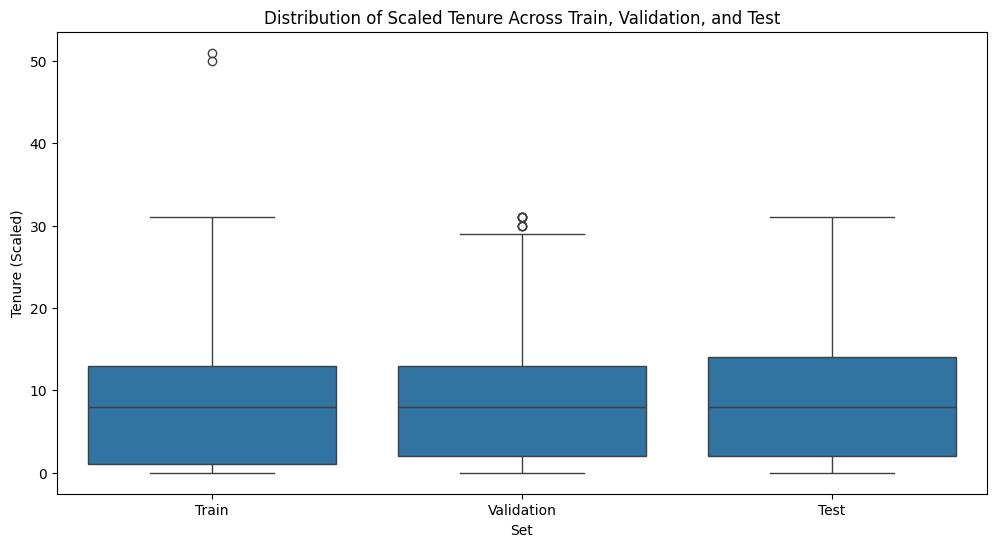

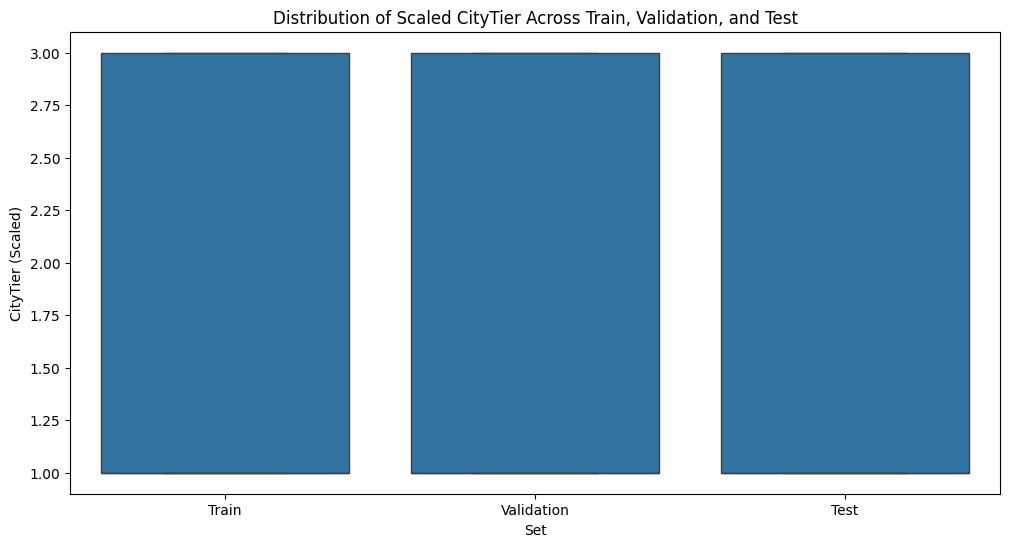

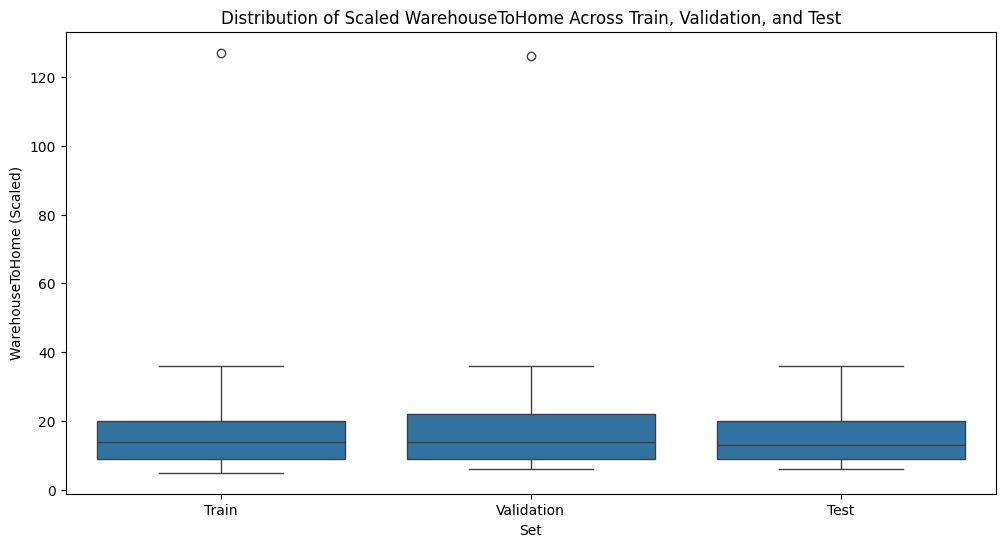

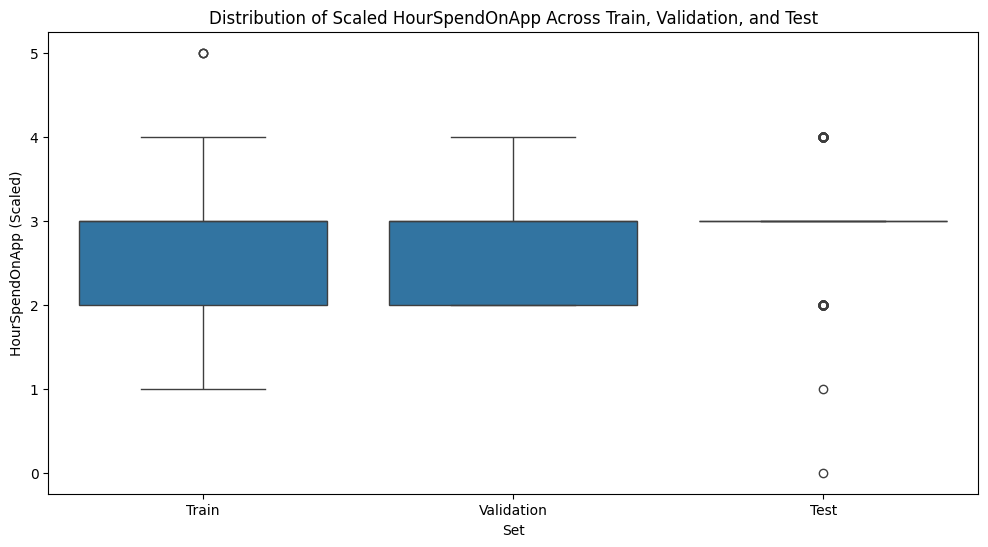

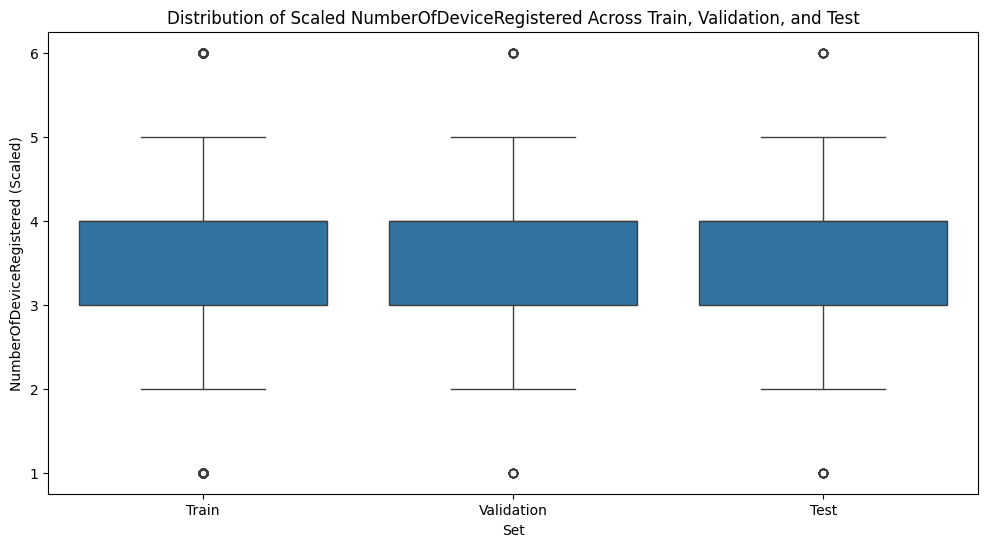

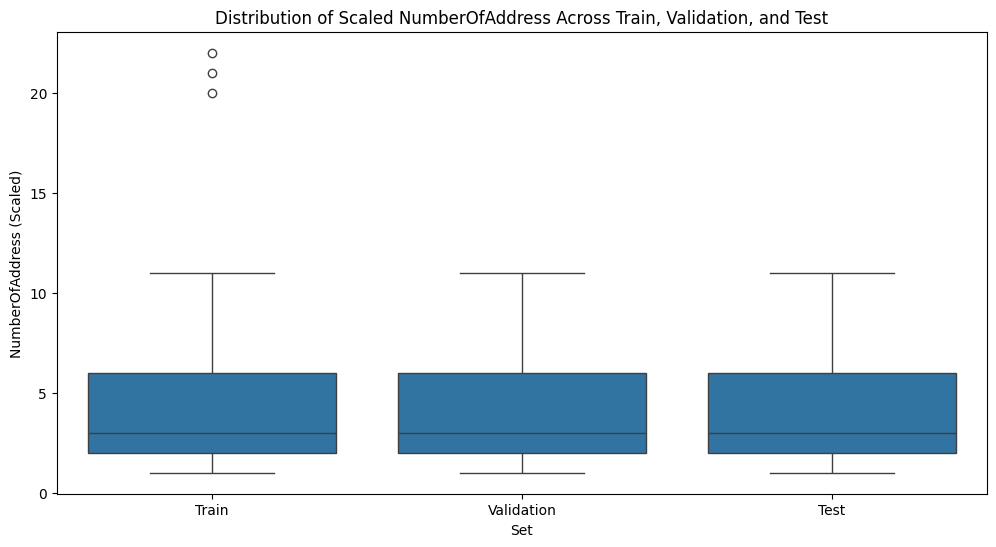

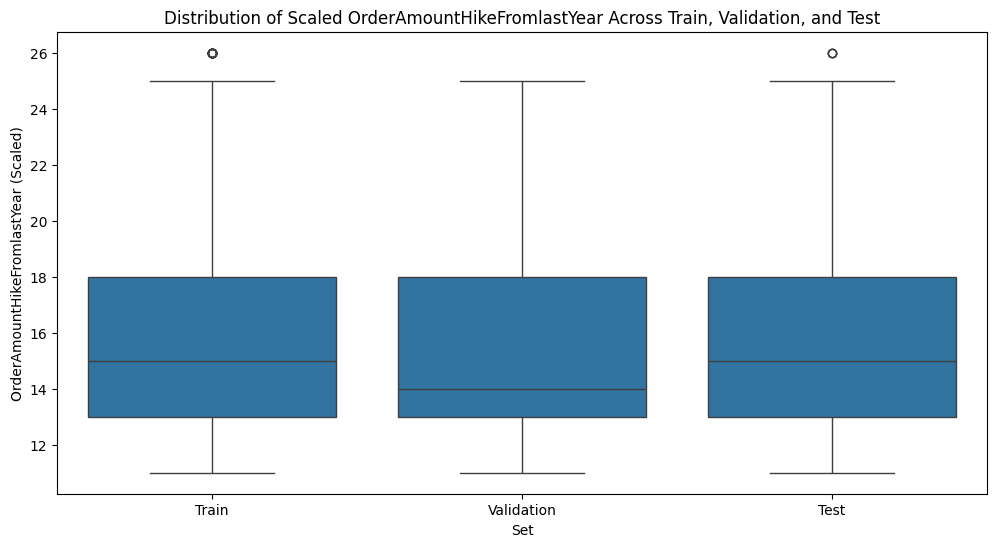

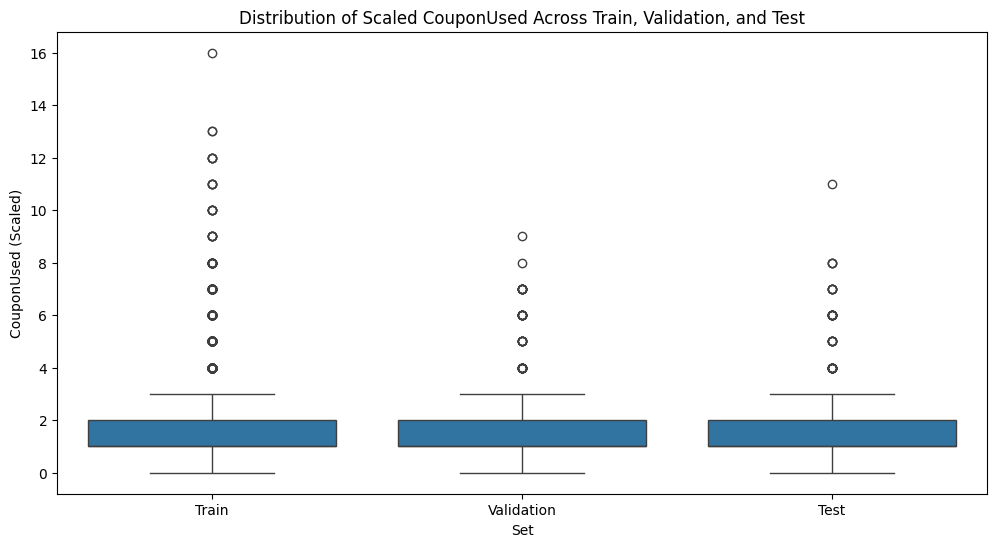

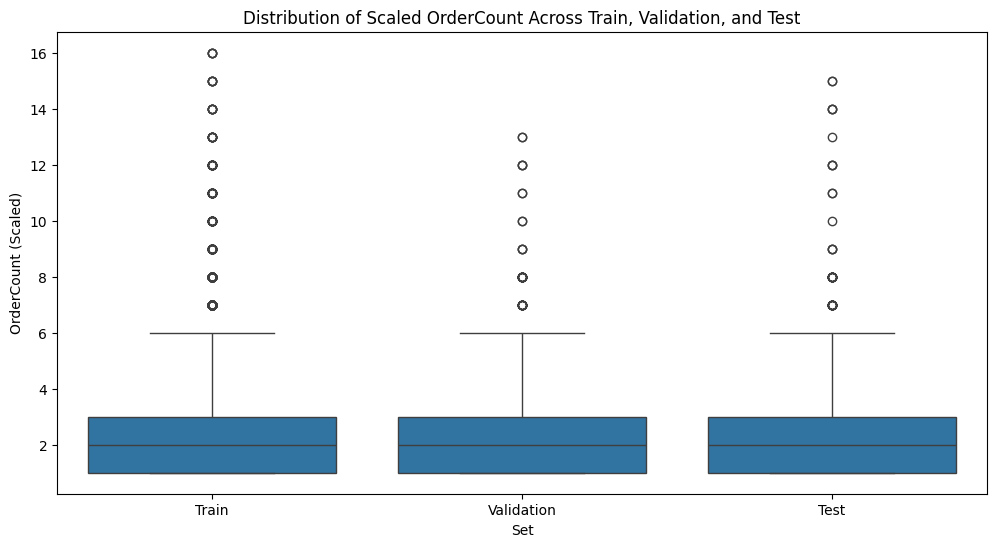

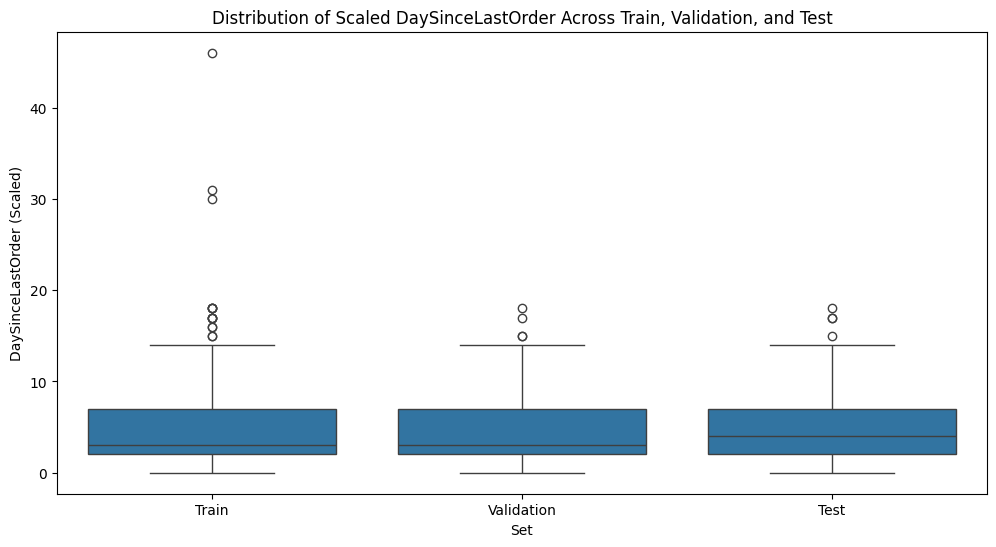

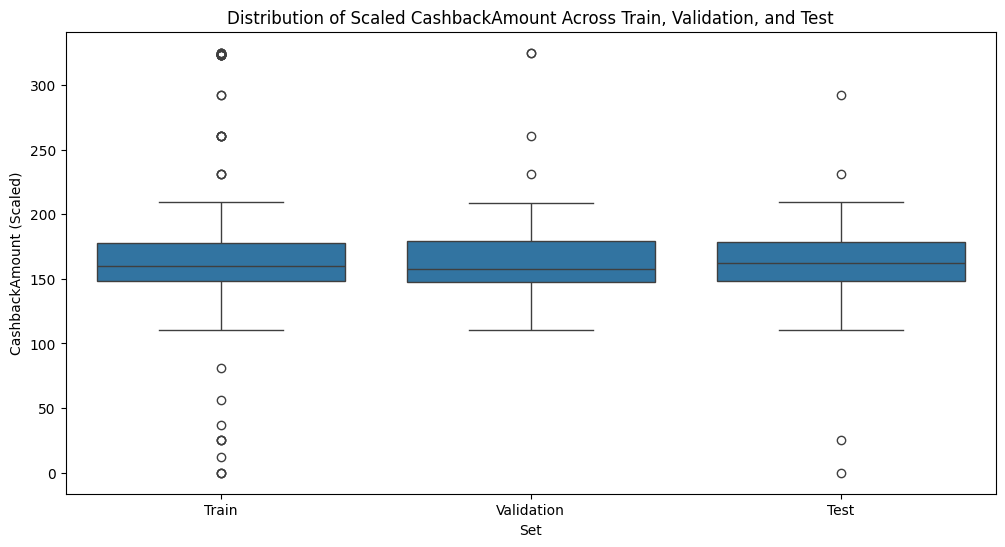

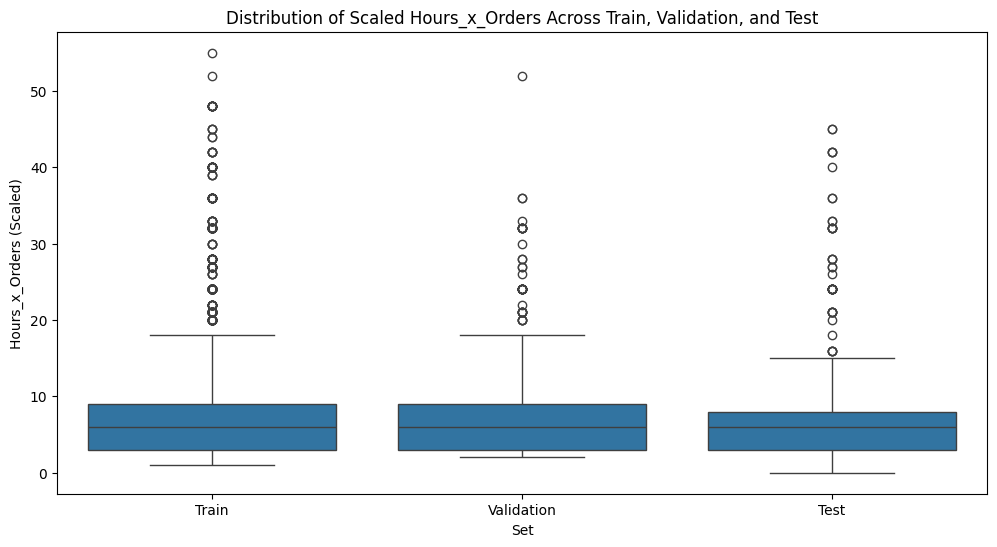

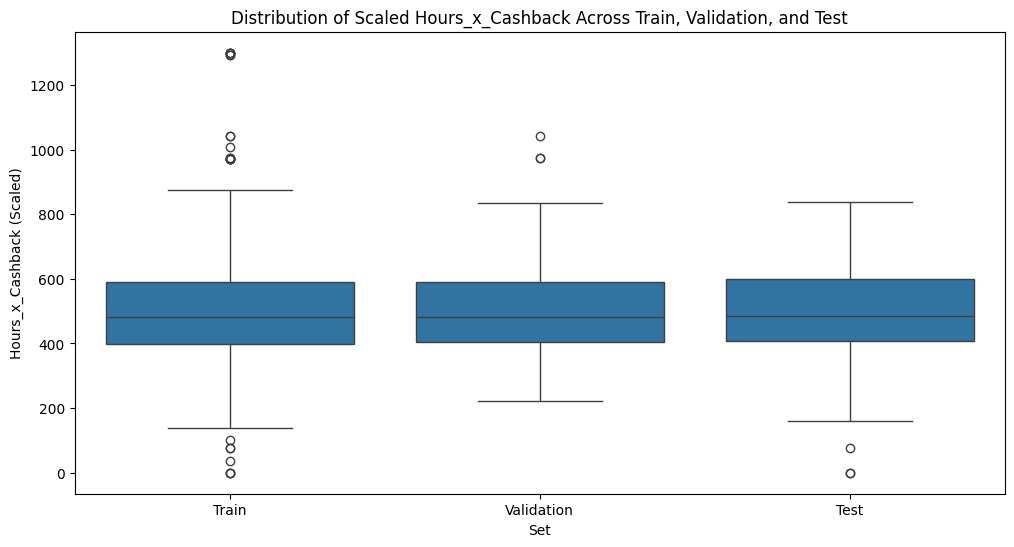

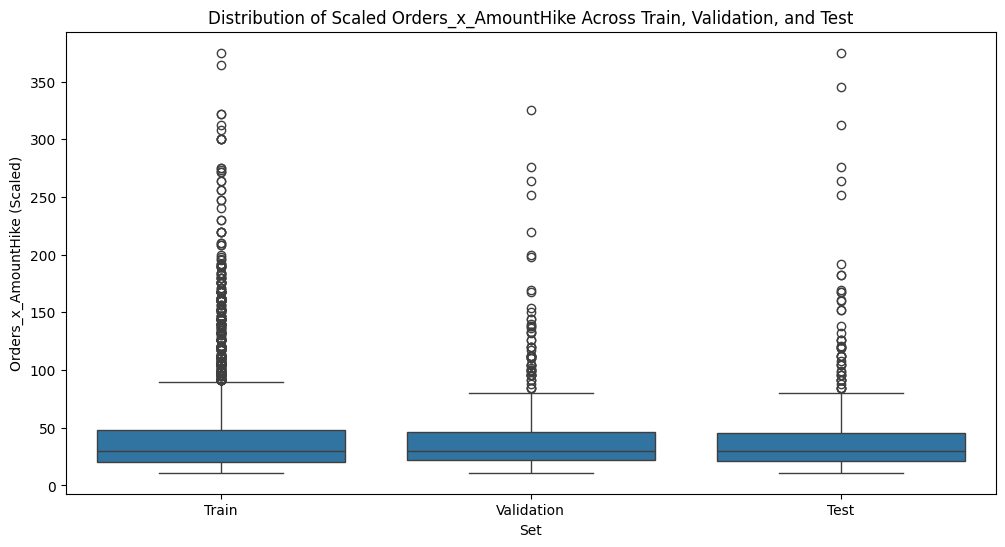

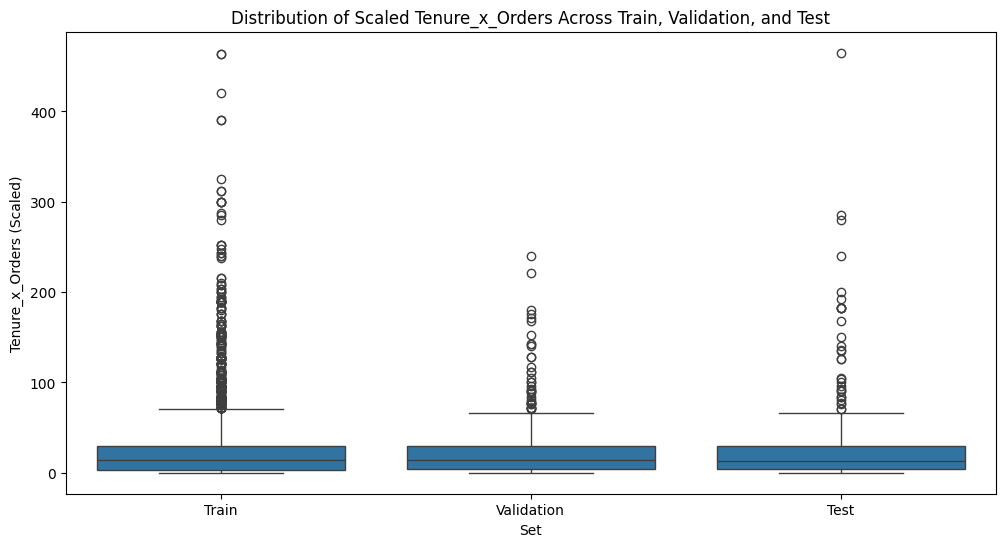

In [ ]:
# Feature scaling standarization
# Try Z-score normalization
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns that were scaled (same list as before)
numerical_cols_to_scale = [
    'Tenure',
    'CityTier',
    'WarehouseToHome',
    'HourSpendOnApp',
    'NumberOfDeviceRegistered',
    'NumberOfAddress',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount',
    'Hours_x_Orders',
    'Hours_x_Cashback',
    'Orders_x_AmountHike',
    'Tenure_x_Orders',
]

# Use box plots (display across train, validation, test after scaling)
print("\nVisualizing Scaled Distributions Across Train, Validation, and Test Sets (Box Plots):")
for col in numerical_cols_to_scale:
    plt.figure(figsize=(12, 6))

    # Use a temp df to make this a bit easier
    temp_df_scaled = pd.DataFrame({
        'Value': pd.concat([X_train[col], X_val[col], X_test[col]]),
        'Set': ['Train'] * len(X_train) + ['Validation'] * len(X_val) + ['Test'] * len(X_test)
    })

    sns.boxplot(x='Set', y='Value', data=temp_df_scaled)
    plt.title(f'Distribution of Scaled {col} Across Train, Validation, and Test')
    plt.ylabel(f'{col} (Scaled)')
    plt.show()
    print()





Checking to see if we have maintained stratification of the churn class distribution across the data split.

In [ ]:
# Ensure that we've maintained stratification of the churn class distribution across our splits

print("\nChurn distribution in original data:")
print(y.value_counts(normalize=True))

print("\nChurn distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nChurn distribution in y_val:")
print(y_val.value_counts(normalize=True))

print("\nChurn distribution in y_test:")
print(y_test.value_counts(normalize=True))



Churn distribution in original data:
Churn
0    0.832803
1    0.167197
Name: proportion, dtype: float64

Churn distribution in y_train:
Churn
0    0.832726
1    0.167274
Name: proportion, dtype: float64

Churn distribution in y_val:
Churn
0    0.832891
1    0.167109
Name: proportion, dtype: float64

Churn distribution in y_test:
Churn
0    0.833333
1    0.166667
Name: proportion, dtype: float64


This code addresses class imbalance in the training data using the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. It applies SMOTE to the training features (X) and target variable (y) to generate synthetic samples of the minority class. The process significantly balances the class distribution in the training set, as can be seen in the updated value counts and the visualization.



Original training set class distribution:
Churn
0    2514
1     505
Name: count, dtype: int64

Training set class distribution after SMOTE:
Churn
0    2514
1    2514
Name: count, dtype: int64


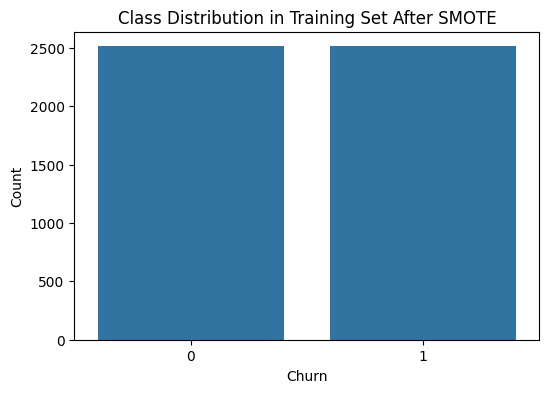

In [53]:
# Try using SMOTE (synthetic minority over-sampling technique) to address this
# Class imbalance.

# Some of these libraries are repetitive, however included here to help debug the cell
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Check the original distribution in the training set
print("Original training set class distribution:")
print(y_train.value_counts())

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("\nTraining set class distribution after SMOTE:")
print(y_train_resampled.value_counts())

# Visualize the distribution after SMOTE
plt.figure(figs=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution in Training Set After SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()



After applying SMOTE the training set class distribution is now much more balanced.


The following cells represent the creation of several different models that can be used to predict churn in a customer base.

This cell starts the model building phase by establishing a baseline logistic regression model to predict customer churn. It trains the model on the SMOTE-resampled training data and then evaluates the performance on the validation set. The evaluation includes calculating accuracy, generating a classification report (precision, recall, F1-score), and displaying a confusion matrix to show the model's predictive capabilities for both churn and non-churn classes.

In [ ]:
# Going to try to apply several different supervised machine learning algorithms.

# Apply a logistic regression model to create a baseline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' because our dataset is on the smaller side

# Fit the model to the training data
print("Training the Logistic Regression model...")
log_reg_model.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")

# Make predictions
y_val_pred = log_reg_model.predict(X_val)

# Evaluate the model on the validation set
print("\nEvaluating the model on the validation set:")

# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (includes Precision, Recall, F1-Score)
# Target names are 'Not Churn' (0) and 'Churn' (1)
target_names = ['Not Churn', 'Churn']
report = classification_report(y_val, y_val_pred, target_names=target_names)
print("\nClassification Report:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# You can interpret the confusion matrix:
print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (Correctly predicted Not Churn): {conf_matrix[0, 0]}")
print(f"False Positives (Incorrectly predicted Churn): {conf_matrix[0, 1]} (Type I error)")
print(f"False Negatives (Incorrectly predicted Not Churn): {conf_matrix[1, 0]} (Type II error)")
print(f"True Positives (Correctly predicted Churn): {conf_matrix[1, 1]}")

Training the Logistic Regression model...
Model training complete.

Evaluating the model on the validation set:
Accuracy: 0.8568

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.90      0.94      0.92       314
       Churn       0.59      0.46      0.52        63

    accuracy                           0.86       377
   macro avg       0.74      0.70      0.72       377
weighted avg       0.85      0.86      0.85       377


Confusion Matrix:
[[294  20]
 [ 34  29]]

Interpretation of Confusion Matrix:
True Negatives (Correctly predicted Not Churn): 294
False Positives (Incorrectly predicted Churn): 20 (Type I error)
False Negatives (Incorrectly predicted Not Churn): 34 (Type II error)
True Positives (Correctly predicted Churn): 29


This cell focuses on training a Random Forest classifier on the SMOTE-resampled training data to predict customer churn. After training, it evaluates the model's performance on the validation set, providing metrics such as accuracy, a classification report (precision, recall, F1-score for both classes), and a confusion matrix to show its predictive strengths and weaknesses.

In [ ]:
# Try a Random Forest model

# Import the RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
# Start with a reasonable number of estimators, e.g., 100 (as per reference [1])
# and set random_state for reproducibility.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the SMOTE-resampled training data
print("Training the Random Forest model...")
rf_model.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")

# Make predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the Random Forest model on the validation set
print("\nEvaluating the Random Forest model on the validation set:")

# Accuracy
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification Report (includes Precision, Recall, F1-Score)
# Target names are 'Not Churn' (0) and 'Churn' (1)
target_names = ['Not Churn', 'Churn']
report_rf = classification_report(y_val, y_val_pred_rf, target_names=target_names)
print("\nClassification Report:")
print(report_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# Interpretation of the confusion matrix:
print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (Correctly predicted Not Churn): {conf_matrix_rf[0, 0]}")
print(f"False Positives (Incorrectly predicted Churn): {conf_matrix_rf[0, 1]} (Type I error)")
print(f"False Negatives (Incorrectly predicted Not Churn): {conf_matrix_rf[1, 0]} (Type II error)")
print(f"True Positives (Correctly predicted Churn): {conf_matrix_rf[1, 1]}")

Training the Random Forest model...
Model training complete.

Evaluating the Random Forest model on the validation set:
Accuracy: 0.9469

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.96      0.98      0.97       314
       Churn       0.88      0.79      0.83        63

    accuracy                           0.95       377
   macro avg       0.92      0.89      0.90       377
weighted avg       0.95      0.95      0.95       377


Confusion Matrix:
[[307   7]
 [ 13  50]]

Interpretation of Confusion Matrix:
True Negatives (Correctly predicted Not Churn): 307
False Positives (Incorrectly predicted Churn): 7 (Type I error)
False Negatives (Incorrectly predicted Not Churn): 13 (Type II error)
True Positives (Correctly predicted Churn): 50


This cell implements and evaluates an XGBoost classifier for predicting customer churn. It trains the model on the SMOTE-resampled training data and then displays the performance on the validation set. The evaluation provides  metrics including accuracy, a classification report (precision, recall, F1-score), and a confusion matrix to get a view of how well this model was able to predict customer churn, given the data.

In [ ]:
# Try a Gradient Boosting model

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              use_label_encoder=False,
                              eval_metric='logloss',
                              random_state=42)

# Fit the model to the training data
print("Training the XGBoost model...")
xgb_model.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")

# Make predictions on the validation set
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluate the XGBoost model on validation set
print("\nEvaluating the XGBoost model on the validation set:")

# Accuracy
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")

# Classification Report (includes Precision, Recall, F1-Score)
# Target names are 'Not Churn' (0) and 'Churn' (1)
target_names = ['Not Churn', 'Churn']
report_xgb = classification_report(y_val, y_val_pred_xgb, target_names=target_names)
print("\nClassification Report:")
print(report_xgb)

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_val, y_val_pred_xgb)
print("\nConfusion Matrix:")
print(conf_matrix_xgb)

# Interpretation of the confusion matrix:
print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (Correctly predicted Not Churn): {conf_matrix_xgb[0, 0]}")
print(f"False Positives (Incorrectly predicted Churn): {conf_matrix_xgb[0, 1]} (Type I error)")
print(f"False Negatives (Incorrectly predicted Not Churn): {conf_matrix_xgb[1, 0]} (Type II error)")
print(f"True Positives (Correctly predicted Churn): {conf_matrix_xgb[1, 1]}")
print()


Training the XGBoost model...
Model training complete.

Evaluating the XGBoost model on the validation set:
Accuracy: 0.9523

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.96      0.98      0.97       314
       Churn       0.91      0.79      0.85        63

    accuracy                           0.95       377
   macro avg       0.93      0.89      0.91       377
weighted avg       0.95      0.95      0.95       377


Confusion Matrix:
[[309   5]
 [ 13  50]]

Interpretation of Confusion Matrix:
True Negatives (Correctly predicted Not Churn): 309
False Positives (Incorrectly predicted Churn): 5 (Type I error)
False Negatives (Incorrectly predicted Not Churn): 13 (Type II error)
True Positives (Correctly predicted Churn): 50



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:13:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


This cell trains a Support Vector Machine (SVM) model using a pipeline that first scales the data with StandardScaler and then applies a linear kernel SVM classifier. The pipeline is fitted on the SMOTE-resampled training data to predict customer churn. The model's performance is evaluated on the validation set, providing metrics liincluding accuracy, a classification report, and a confusion matrix.

In [ ]:
# Try SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# The StandardScaler should fit on the training data.
pipeline_svm = make_pipeline(StandardScaler(), svm_model)

# Fit the pipeline to the training data
print("Training the SVM model...")
pipeline_svm.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")

# Make predictions on the validation set
y_val_pred_svm = pipeline_svm.predict(X_val)

# Evaluate the SVM model
print("\nEvaluating the SVM model on the validation set:")

# Accuracy
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Classification Report (includes Precision, Recall, F1-Score)
# Target names are 'Not Churn' (0) and 'Churn' (1)
target_names = ['Not Churn', 'Churn']
report_svm = classification_report(y_val, y_val_pred_svm, target_names=target_names)
print("\nClassification Report:")
print(report_svm)

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_val, y_val_pred_svm)
print("\nConfusion Matrix:")
print(conf_matrix_svm)

# Interpretation of the confusion matrix:
print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (Correctly predicted Not Churn): {conf_matrix_svm[0, 0]}")
print(f"False Positives (Incorrectly predicted Churn): {conf_matrix_svm[0, 1]} (Type I error)")
print(f"False Negatives (Incorrectly predicted Not Churn): {conf_matrix_svm[1, 0]} (Type II error)")
print(f"True Positives (Correctly predicted Churn): {conf_matrix_svm[1, 1]}")

Training the SVM model...
Model training complete.

Evaluating the SVM model on the validation set:
Accuracy: 0.8541

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.89      0.94      0.91       314
       Churn       0.59      0.43      0.50        63

    accuracy                           0.85       377
   macro avg       0.74      0.68      0.71       377
weighted avg       0.84      0.85      0.84       377


Confusion Matrix:
[[295  19]
 [ 36  27]]

Interpretation of Confusion Matrix:
True Negatives (Correctly predicted Not Churn): 295
False Positives (Incorrectly predicted Churn): 19 (Type I error)
False Negatives (Incorrectly predicted Not Churn): 36 (Type II error)
True Positives (Correctly predicted Churn): 27


This cell trains a Decision Tree classifier on the SMOTE-resampled training data to predict customer churn. It evaluates the model's performance on the validation set by calculating accuracy, generating a classification report (with precision, recall, and F1-score for each class), and displaying a confusion matrix.

In [ ]:
# Create a decision tree for this problem

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random_state for reproducibility.
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
print("Training the Decision Tree model...")
dt_model.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")

# Make predictions
y_val_pred_dt = dt_model.predict(X_val)

# Evaluate the Decision Tree model on the validation set
print("\nEvaluating the Decision Tree model on the validation set:")

# Accuracy
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")

# Classification Report (includes Precision, Recall, F1-Score)
# Target names are 'Not Churn' (0) and 'Churn' (1)
target_names = ['Not Churn', 'Churn']
report_dt = classification_report(y_val, y_val_pred_dt, target_names=target_names)
print("\nClassification Report:")
print(report_dt)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_val, y_val_pred_dt)
print("\nConfusion Matrix:")
print(conf_matrix_dt)

# Interpretation of the confusion matrix:
print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (Correctly predicted Not Churn): {conf_matrix_dt[0, 0]}")
print(f"False Positives (Incorrectly predicted Churn): {conf_matrix_dt[0, 1]} (Type I error)")
print(f"False Negatives (Incorrectly predicted Not Churn): {conf_matrix_dt[1, 0]} (Type II error)")
print(f"True Positives (Correctly predicted Churn): {conf_matrix_dt[1, 1]}")


Training the Decision Tree model...
Model training complete.

Evaluating the Decision Tree model on the validation set:
Accuracy: 0.9045

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.95      0.94      0.94       314
       Churn       0.70      0.75      0.72        63

    accuracy                           0.90       377
   macro avg       0.82      0.84      0.83       377
weighted avg       0.91      0.90      0.91       377


Confusion Matrix:
[[294  20]
 [ 16  47]]

Interpretation of Confusion Matrix:
True Negatives (Correctly predicted Not Churn): 294
False Positives (Incorrectly predicted Churn): 20 (Type I error)
False Negatives (Incorrectly predicted Not Churn): 16 (Type II error)
True Positives (Correctly predicted Churn): 47


This cell compares the performance of the previously created supervised machine learning models on our churn prediction task. It extracts recall, precision, and F1-score for the 'Churn' class from each model's classification report. It visualizes these key metrics in a bar plot to enable a comparison of how effectively each model identifies and predicts churn.

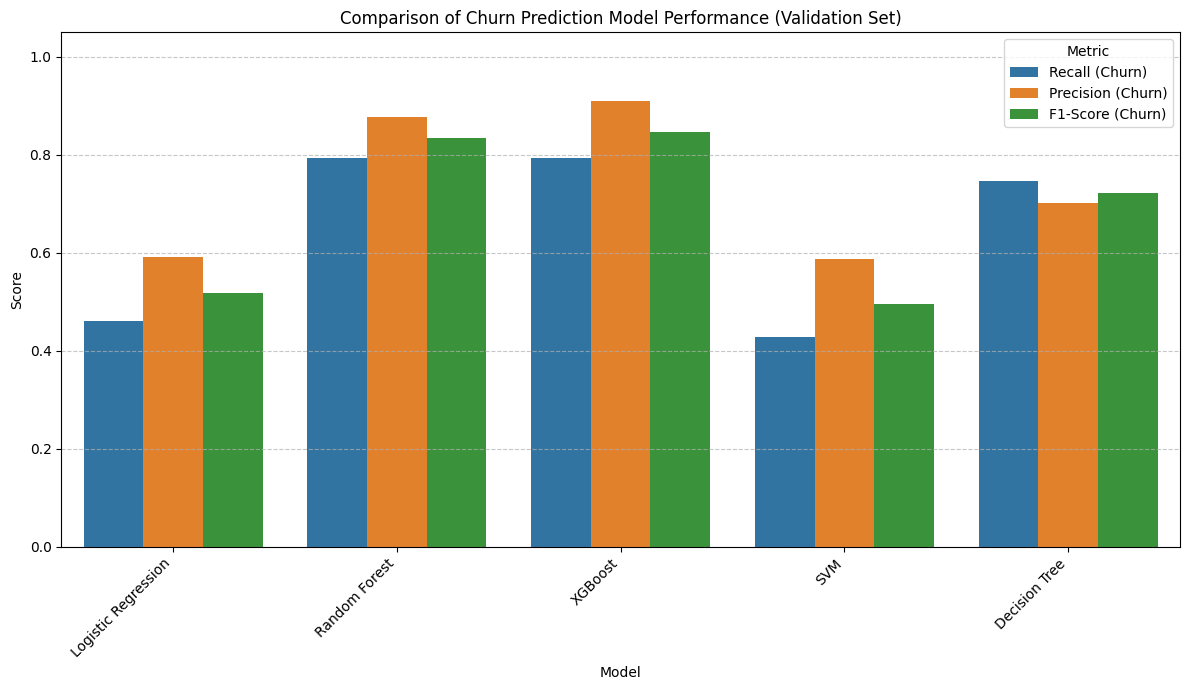

In [ ]:
# Compare the models and visualize

# Some of these imports are not needed, they are hereto help debug the cell
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

# Get classification reports for each model
report_log_reg = classification_report(y_val, y_val_pred, output_dict=True)
report_rf = classification_report(y_val, y_val_pred_rf, output_dict=True)
report_xgb = classification_report(y_val, y_val_pred_xgb, output_dict=True)
report_svm = classification_report(y_val, y_val_pred_svm, output_dict=True)
report_dt = classification_report(y_val, y_val_pred_dt, output_dict=True)

# Extract metrics for the 'Churn' class (label '1')
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Decision Tree'],
    'Recall (Churn)': [
        report_log_reg['1']['recall'],
        report_rf['1']['recall'],
        report_xgb['1']['recall'],
        report_svm['1']['recall'],
        report_dt['1']['recall']
    ],
    'Precision (Churn)': [
        report_log_reg['1']['precision'],
        report_rf['1']['precision'],
        report_xgb['1']['precision'],
        report_svm['1']['precision'],
        report_dt['1']['precision']
    ],
    'F1-Score (Churn)': [
        report_log_reg['1']['f1-score'],
        report_rf['1']['f1-score'],
        report_xgb['1']['f1-score'],
        report_svm['1']['f1-score'],
        report_dt['1']['f1-score']
    ]
}

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics_data)

# shift the DataFrame to long format for Seaborn bar plot
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted)

plt.title('Comparison of Churn Prediction Model Performance (Validation Set)')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1.05) # Metrics should be between 0 and 1
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # trying to prevent labels overlapping
plt.show()




This cell calculates and displays the accuracy scores for the five different machine learning models (Logistic Regression, Random Forest, XGBoost, SVM, and Decision Tree) on the validation dataset. This is another (straight-forward) way to compare the effectiveness of this 5 models to predict churn given the data set.

In [ ]:
# Look at accuracy
from sklearn.metrics import accuracy_score

print("Accuracy Scores (Validation Set):")
print("-" * 35)

# Logistic Regression Accuracy
accuracy_log_reg = accuracy_score(y_val, y_val_pred)
print(f"Logistic Regression  : {accuracy_log_reg:.4f}")

# Random Forest Accuracy
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest        : {accuracy_rf:.4f}")

# XGBoost Accuracy
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print(f"XGBoost              : {accuracy_xgb:.4f}")

# SVM Accuracy
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print(f"SVM                  : {accuracy_svm:.4f}")

# Decision Tree Accuracy
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print(f"Decision Tree        : {accuracy_dt:.4f}")


Accuracy Scores (Validation Set):
-----------------------------------
Logistic Regression  : 0.8568
Random Forest        : 0.9469
XGBoost              : 0.9523
SVM                  : 0.8541
Decision Tree        : 0.9045


The top two performing models are Random Forest and XGBoost. No hyperparameter tuning has been applied to either model yet. Let's see if some improvements can be gained through hyperparameter tuning.

This cell carries out hyperparameter tuning on our Random Forest classifier using GridSearchCV to find the best combination of parameters that maximize the ROC AUC score. It creates a search grid for various hyperparameters and then fits the GridSearchCV object to the SMOTE-resampled training data. It then uses the best performing model from the grid search to evaluate the data in the validation set, displaying the accuracy, classification report, and confusion matrix to show any refined performance.

Note: performance here was reasonable, utilizing the hardware available through Colab this took a few minutes to execute.


In [ ]:
# Apply hyperparameter tuning to Ramdom Forest

# Note: I used Gemini to help figure out how to hyperparameter tun Random Forest

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # we can try both
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, make_scorer

# Setting random_state for reproducibility
rf_model_base = RandomForestClassifier(random_state=42)

# Adjust based on resourves
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [10, 20, None],    # Maximum depth of trees (None means full depth)
    'min_samples_split': [2, 5],     # Min samples required to split a node
    'min_samples_leaf': [1, 2],      # Min samples required at a leaf node
    'max_features': ['sqrt', 0.5],   # Number of features to consider per split
    'class_weight': [None, 'balanced'] # Handling class imbalance
}

# Let's use roc_auc, we can try other ones
scoring_metric = 'roc_auc'

grid_search_rf = GridSearchCV(estimator=rf_model_base,
                              param_grid=param_grid,
                              scoring=scoring_metric,
                              cv=5, # Try 5-fold cross-validation
                              n_jobs=-1, # use all available CPU cores
                              verbose=2)

# Fit the grid search to the training data
print(f"Starting Grid Search for Random Forest, trying to optimize for {scoring_metric}...")
grid_search_rf.fit(X_train_resampled, y_train_resampled)
print("Grid Search complete.")

# Print the parameters found by the grid search
print("\nBest parameters found: ", grid_search_rf.best_params_)

# Print the cross-validation score achieved with the parameters
print(f"Best cross-validation score ({scoring_metric}): {grid_search_rf.best_score_:.4f}")

# Get the best model found by the grid search
best_rf_model = grid_search_rf.best_estimator_

# --- Evaluate the best model on the validation Set ---
print("\nEvaluating the BEST Random Forest model (from Grid Search) on the validation set:")

# Make predictions (class labels) on the validation set
y_val_pred_best_rf = best_rf_model.predict(X_val)

# Make probability predictions on the validation set (needed for AUC)
try:
    y_val_proba_best_rf = best_rf_model.predict_proba(X_val)[:, 1]
    auc_best_rf = roc_auc_score(y_val, y_val_proba_best_rf)
    print(f"AUC-ROC: {auc_best_rf:.4f}")
except AttributeError:
    print("predict_proba not available for the best model.")
except ValueError as e:
    print(f"AUC-ROC calculation error: {e}")

# Print accuracy metric
accuracy_best_rf = accuracy_score(y_val, y_val_pred_best_rf)
print(f"Accuracy: {accuracy_best_rf:.4f}")

# Classification Report
target_names = ['Not Churn', 'Churn']
report_best_rf = classification_report(y_val, y_val_pred_best_rf, target_names=target_names)
print("\nClassification Report:")
print(report_best_rf)

# Confusion Matrix
conf_matrix_best_rf = confusion_matrix(y_val, y_val_pred_best_rf)
print("\nConfusion Matrix:")
print(conf_matrix_best_rf)

# Interpretation of the confusion matrix:
print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (Correctly predicted Not Churn): {conf_matrix_best_rf[0, 0]}")
print(f"False Positives (Incorrectly predicted Churn): {conf_matrix_best_rf[0, 1]} (Type I error)")
print(f"False Negatives (Incorrectly predicted Not Churn): {conf_matrix_best_rf[1, 0]} (Type II error)")
print(f"True Positives (Correctly predicted Churn): {conf_matrix_best_rf[1, 1]}")

Starting Grid Search for Random Forest, optimizing for roc_auc...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Grid Search complete.

Best parameters found:  {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score (roc_auc): 0.9916

Evaluating the BEST Random Forest model (from Grid Search) on the validation set:
AUC-ROC: 0.9755
Accuracy: 0.9496

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.97      0.97      0.97       314
       Churn       0.85      0.84      0.85        63

    accuracy                           0.95       377
   macro avg       0.91      0.91      0.91       377
weighted avg       0.95      0.95      0.95       377


Confusion Matrix:
[[305   9]
 [ 10  53]]

Interpretation of Confusion Matrix:
True Negatives (Correctly predicted Not Churn): 305
False Positives (Incorrectly predicted C

This cell focuses on hyperparameter tuning for the XGBoost classifier from before using GridSearchCV to optimize performance. It's looking to optimize the ROC AUC score. It is set up to search through a predefined grid of XGBoost parameters on the SMOTE-resampled training data. The best-performing model from this tuning process is then evaluated on the validation set, providing an assessment using the same accuracy, ROC AUC, a classification report, and a confusion matrix from the other models.

Note: performance here was a significant consideration. With 5 folds, running on all cores available, this process took over 45 minutes to complete. This was on a limited data set. Operating on a larger data set, this level of performance would require the system to be designed such that batch mode would need to be utilized and retraining updates would need to be planned.

In [ ]:
# Apply hyperparameter tuning to XGBoost

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # will try bosth
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Setting random_state for reproducibility and common parameters
xgb_model_base = xgb.XGBClassifier(objective='binary:logistic',
                                   use_label_encoder=False, # avoid warnings
                                   eval_metric='logloss',
                                   random_state=42)

# Define a parameter grid to search
# Note: I used Gemini to help figure this part out
param_grid_xgb = {
    'n_estimators': [100, 200, 300], # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1], # Step size shrinkage
    'max_depth': [3, 5, 7], # Maximum depth of trees
    'min_child_weight': [1, 3, 5], # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2], # Minimum loss reduction required to make a further partition
    'subsample': [0.8, 1.0], # Fraction of samples used for fitting the individual base learners
    'colsample_bytree': [0.8, 1.0], # Fraction of features used when building each tree
    'lambda': [1, 1.5], # L2 regularization term on weights
    'alpha': [0, 0.5], # L1 regularization term on weights
}

# Define the scoring metric for tuning
scoring_metric_xgb = 'roc_auc' # can also try 'recall', 'precision', 'f1'

# Using GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model_base,
                              param_grid=param_grid_xgb,
                              scoring=scoring_metric_xgb,
                              cv=5, # Using 5-fold cross-validation
                              n_jobs=-1, # Try to use all available CPU cores
                              verbose=3)


# Fit the grid/random search to the training data
print(f"Starting Tuning for XGBoost, optimizing for {scoring_metric_xgb}...")
# Use the right search object (grid_search_xgb or random_search_xgb)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
print("Tuning complete.")

# Print the best parameters found
print("\nBest parameters found: ", grid_search_xgb.best_params_) # Use .best_params_

# Print the best cross-validation score
print(f"Best cross-validation score ({scoring_metric_xgb}): {grid_search_xgb.best_score_:.4f}") # Use .best_score_

# Get the best model found
best_xgb_model = grid_search_xgb.best_estimator_ # try to use .best_estimator_

# Evaluate the best model on the validation set

print("\nEvaluating the BEST XGBoost model (from Tuning) on the validation set:")

# Make predictions
y_val_pred_best_xgb = best_xgb_model.predict(X_val)

# Make probability predictions (needed for AUC)
try:
    y_val_proba_best_xgb = best_xgb_model.predict_proba(X_val)[:, 1]
    auc_best_xgb = roc_auc_score(y_val, y_val_proba_best_xgb)
    print(f"AUC-ROC: {auc_best_xgb:.4f}")
except AttributeError:
    print("predict_proba not available for the best model.")
except ValueError as e:
    print(f"AUC-ROC calculation error: {e}")

# Print accuracy metric
accuracy_best_xgb = accuracy_score(y_val, y_val_pred_best_xgb)
print(f"Accuracy: {accuracy_best_xgb:.4f}")

# Classification Report
target_names = ['Not Churn', 'Churn']
report_best_xgb = classification_report(y_val, y_val_pred_best_xgb, target_names=target_names)
print("\nClassification Report:")
print(report_best_xgb)

# Confusion Matrix
conf_matrix_best_xgb = confusion_matrix(y_val, y_val_pred_best_xgb)
print("\nConfusion Matrix:")
print(conf_matrix_best_xgb)

# Interpretation of the confusion matrix:
print("\nInterpretation of Confusion Matrix:")
print(f"True Negatives (Correctly predicted Not Churn): {conf_matrix_best_xgb[0, 0]}")
print(f"False Positives (Incorrectly predicted Churn): {conf_matrix_best_xgb[0, 1]} (Type I error)")
print(f"False Negatives (Incorrectly predicted Not Churn): {conf_matrix_best_xgb[1, 0]} (Type II error)")
print(f"True Positives (Correctly predicted Churn): {conf_matrix_best_xgb[1, 1]}")


Starting Tuning for XGBoost, optimizing for roc_auc...
Fitting 5 folds for each of 3888 candidates, totalling 19440 fits
Tuning complete.

Best parameters found:  {'alpha': 0, 'colsample_bytree': 0.8, 'gamma': 0, 'lambda': 1.5, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score (roc_auc): 0.9902

Evaluating the BEST XGBoost model (from Tuning) on the validation set:
AUC-ROC: 0.9723
Accuracy: 0.9416

Classification Report:
              precision    recall  f1-score   support

   Not Churn       0.95      0.98      0.97       314
       Churn       0.89      0.75      0.81        63

    accuracy                           0.94       377
   macro avg       0.92      0.86      0.89       377
weighted avg       0.94      0.94      0.94       377


Confusion Matrix:
[[308   6]
 [ 16  47]]

Interpretation of Confusion Matrix:
True Negatives (Correctly predicted Not Churn): 308
False Positives (Incorrectly predicted 

This cell provides a detailed comparison of our two hyperparameter-tuned models: Random Forest and XGBoost. It evaluates each model on the validation set, displays our key metrics including AUC-ROC, Accuracy, Recall, Precision, and F1-Score for the 'Churn' class, slong with their confusion matrices. It consolidates these metrics into a comparison table and a bar plot, offering an easy to compare visualization to determine which model performs better for our churn prediction task.

--- Comparing Tuned Model Performance on Validation Set ---

Tuned Random Forest (Best Estimator):
  AUC-ROC: 0.9755
  Accuracy: 0.9496
  Recall (Churn): 0.8413
  Precision (Churn): 0.8548
  F1-Score (Churn): 0.8480
  Confusion Matrix:
[[305   9]
 [ 10  53]]


Tuned XGBoost (Best Estimator):
  AUC-ROC: 0.9723
  Accuracy: 0.9416
  Recall (Churn): 0.7460
  Precision (Churn): 0.8868
  F1-Score (Churn): 0.8103
  Confusion Matrix:
[[308   6]
 [ 16  47]]


--- Performance Comparison Table (Validation Set) ---


,Model,AUC-ROC,Accuracy,Recall (Churn),Precision (Churn),F1-Score (Churn),True Positives (Churn),False Positives,False Negatives,True Negatives
0,Tuned Random Forest,0.9755,0.9496,0.8413,0.8548,0.8480,53,9,10,305
1,Tuned XGBoost,0.9723,0.9416,0.7460,0.8868,0.8103,47,6,16,309


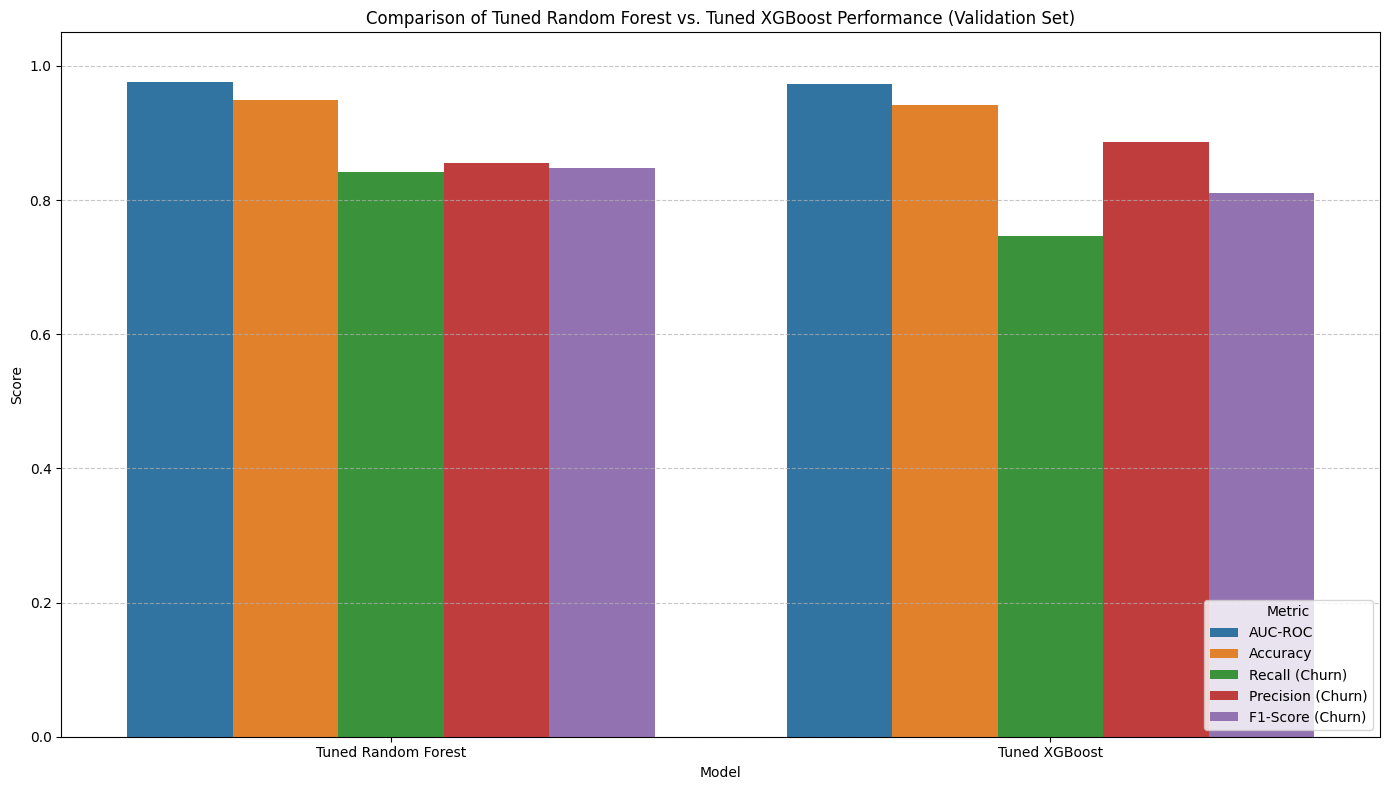

In [51]:
# Compare results of the two hyperparameter-tuned models

# Some of these imports are repeated from above but added for testing the cell
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Import display for better table rendering

print("--- Comparing Tuned Model Performance on Validation Set ---")

# Evaluate Tuned Random Forest
print("\nTuned Random Forest (Best Estimator):")
y_val_pred_best_rf = best_rf_model.predict(X_val)
try:
    y_val_proba_best_rf = best_rf_model.predict_proba(X_val)[:, 1]
    auc_best_rf = roc_auc_score(y_val, y_val_proba_best_rf)
    print(f"  AUC-ROC: {auc_best_rf:.4f}")
except (AttributeError, ValueError) as e:
    print(f"  AUC-ROC: N/A ({e})")

accuracy_best_rf = accuracy_score(y_val, y_val_pred_best_rf)
print(f"  Accuracy: {accuracy_best_rf:.4f}")

report_best_rf = classification_report(y_val, y_val_pred_best_rf, target_names=['Not Churn', 'Churn'], output_dict=True)
print(f"  Recall (Churn): {report_best_rf['Churn']['recall']:.4f}")
print(f"  Precision (Churn): {report_best_rf['Churn']['precision']:.4f}")
print(f"  F1-Score (Churn): {report_best_rf['Churn']['f1-score']:.4f}")
conf_matrix_best_rf = confusion_matrix(y_val, y_val_pred_best_rf)
print(f"  Confusion Matrix:\n{conf_matrix_best_rf}")

# Evaluate Tuned XGBoost
print("\n\nTuned XGBoost (Best Estimator):")
y_val_pred_best_xgb = best_xgb_model.predict(X_val)
try:
    y_val_proba_best_xgb = best_xgb_model.predict_proba(X_val)[:, 1]
    auc_best_xgb = roc_auc_score(y_val, y_val_proba_best_xgb)
    print(f"  AUC-ROC: {auc_best_xgb:.4f}")
except (AttributeError, ValueError) as e:
     print(f"  AUC-ROC: N/A ({e})")

accuracy_best_xgb = accuracy_score(y_val, y_val_pred_best_xgb)
print(f"  Accuracy: {accuracy_best_xgb:.4f}")

report_best_xgb = classification_report(y_val, y_val_pred_best_xgb, target_names=['Not Churn', 'Churn'], output_dict=True)
print(f"  Recall (Churn): {report_best_xgb['Churn']['recall']:.4f}")
print(f"  Precision (Churn): {report_best_xgb['Churn']['precision']:.4f}")
print(f"  F1-Score (Churn): {report_best_xgb['Churn']['f1-score']:.4f}")
conf_matrix_best_xgb = confusion_matrix(y_val, y_val_pred_best_xgb)
print(f"  Confusion Matrix:\n{conf_matrix_best_xgb}")

comparison_data = {
    'Model': ['Tuned Random Forest', 'Tuned XGBoost'],
    # Access metrics from the dictionary reports
    'AUC-ROC': [auc_best_rf if 'auc_best_rf' in locals() else None, # was auc calculated
                 auc_best_xgb if 'auc_best_xgb' in locals() else None], # was auc calculated
    'Accuracy': [accuracy_best_rf, accuracy_best_xgb],
    'Recall (Churn)': [report_best_rf['Churn']['recall'], report_best_xgb['Churn']['recall']],
    'Precision (Churn)': [report_best_rf['Churn']['precision'], report_best_xgb['Churn']['precision']],
    'F1-Score (Churn)': [report_best_rf['Churn']['f1-score'], report_best_xgb['Churn']['f1-score']],
    'True Positives (Churn)': [conf_matrix_best_rf[1, 1], conf_matrix_best_xgb[1, 1]],
    'False Positives': [conf_matrix_best_rf[0, 1], conf_matrix_best_xgb[0, 1]],
    'False Negatives': [conf_matrix_best_rf[1, 0], conf_matrix_best_xgb[1, 0]],
    'True Negatives': [conf_matrix_best_rf[0, 0], conf_matrix_xgb[0, 0]]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n\n--- Performance Comparison Table (Validation Set) ---")
# Format metrics for readability
comparison_df_formatted = comparison_df.copy()
for col in ['AUC-ROC', 'Accuracy', 'Recall (Churn)', 'Precision (Churn)', 'F1-Score (Churn)']:
    if col in comparison_df_formatted.columns:
         # Check if the value is not None before formatting
        comparison_df_formatted[col] = comparison_df_formatted[col].apply(lambda x: f'{x:.4f}' if x is not None else 'N/A')


display(comparison_df_formatted) # trying  better table rendering

# Handle potential None values if AUC calculation failed?
metrics_to_plot = ['Accuracy', 'Recall (Churn)', 'Precision (Churn)', 'F1-Score (Churn)']
if all(metric is not None for metric in comparison_df['AUC-ROC'].values):
    metrics_to_plot.insert(0, 'AUC-ROC')

comparison_melted = comparison_df[metrics_to_plot + ['Model']].melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_melted)

plt.title('Comparison of Tuned Random Forest vs. Tuned XGBoost Performance (Validation Set)')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1.05)
plt.legend(title='Metric', loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

This cell looks at the impact of adjusting the classification threshold on the performance of our tuned XGBoost model. It calculates churn probabilities for the validation set and then re-evaluates key metrics (accuracy, recall, precision, F1-score, and confusion matrix) at these threshold values to see how different thresholds may impact the trade-off between false positives and false negatives.

In [52]:
# Changing the threshold for churn

# Get churn probabilities for the validation set
y_val_proba_best_xgb = best_xgb_model.predict_proba(X_val)[:, 1] # Probabilities of the positive class (Churn)

# Define the different thresholds to test
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

print("Evaluating Tuned XGBoost at different thresholds:")
print("-" * 60)

for threshold in thresholds:
    # Predict class labels using the current threshold
    y_val_pred_threshold = (y_val_proba_best_xgb >= threshold).astype(int)

    print(f"\n--- Threshold: {threshold:.2f} ---")

    # Calculate and print evaluation metrics
    accuracy_thresh = accuracy_score(y_val, y_val_pred_threshold)
    report_thresh = classification_report(y_val, y_val_pred_threshold, target_names=['Not Churn', 'Churn'], output_dict=True)
    conf_matrix_thresh = confusion_matrix(y_val, y_val_pred_threshold)

    print(f"  Accuracy: {accuracy_thresh:.4f}")
    print(f"  Recall (Churn): {report_thresh['Churn']['recall']:.4f}")
    print(f"  Precision (Churn): {report_thresh['Churn']['precision']:.4f}")
    print(f"  F1-Score (Churn): {report_thresh['Churn']['f1-score']:.4f}")
    print(f"  Confusion Matrix:\n{conf_matrix_thresh}")

print("-" * 60)


Evaluating Tuned XGBoost at different thresholds:
------------------------------------------------------------

--- Threshold: 0.30 ---
  Accuracy: 0.9576
  Recall (Churn): 0.8889
  Precision (Churn): 0.8615
  F1-Score (Churn): 0.8750
  Confusion Matrix:
[[305   9]
 [  7  56]]

--- Threshold: 0.40 ---
  Accuracy: 0.9523
  Recall (Churn): 0.8095
  Precision (Churn): 0.8947
  F1-Score (Churn): 0.8500
  Confusion Matrix:
[[308   6]
 [ 12  51]]

--- Threshold: 0.50 ---
  Accuracy: 0.9416
  Recall (Churn): 0.7460
  Precision (Churn): 0.8868
  F1-Score (Churn): 0.8103
  Confusion Matrix:
[[308   6]
 [ 16  47]]

--- Threshold: 0.60 ---
  Accuracy: 0.9337
  Recall (Churn): 0.6984
  Precision (Churn): 0.8800
  F1-Score (Churn): 0.7788
  Confusion Matrix:
[[308   6]
 [ 19  44]]

--- Threshold: 0.70 ---
  Accuracy: 0.9363
  Recall (Churn): 0.6984
  Precision (Churn): 0.8980
  F1-Score (Churn): 0.7857
  Confusion Matrix:
[[309   5]
 [ 19  44]]

--- Threshold: 0.80 ---
  Accuracy: 0.9284
  Recall (

This project developed and evaluated several supervised machine learning models to predict customer churn within an e-commerce context. Starting with data loading, cleaning, and exploratory analysis, the process included handling missing values, identifying data types, engineering some new interaction features, and encoding categorical variables. We also noticed the inherent class imbalance in churn data, so the SMOTE technique was applied to the training set, significantly improving the distribution and providing a more robust dataset for model training.

Baseline models, including Logistic Regression, Random Forest, XGBoost, Support Vector Machine (SVM), and a Decision Tree, were initially trained and evaluated on the validation set. The comparison of performance metrics, including accuracy, recall, precision, and F1-score for the 'Churn' class, showed that the Random Forest and XGBoost models demonstrated reasonable performance in identifying churn risks.

Given these strong initial results, Random Forest and XGBoost were selected for further optimization through hyperparameter tuning using GridSearchCV (which was suggested by Gemini). This process involved searching through a predefined grid of parameter combinations, optimizing for the ROC AUC score. The tuned models were then re-evaluated on the validation set. While the tuning process itself was computationally intensive, reflecting the complexity and resource requirements of optimizing sophisticated models, the final evaluation of the best estimators were reasonable.

The results of this model development and tuning process lays the groundwork for implementing a data-driven churn prediction system. The tuned Random Forest and XGBoost models, having demonstrated competitive performance on the validation data after addressing class imbalance and tuning, are reasonable candidates for deployment in our scenario, and more testing to differentiate between them may be needed. A consideration for the eventual choice will likely need to include the relative costs of false positives and false negatives, model interpretability, and computational efficiency for scoring new customers.